# Flights Data Exploration
## by Omar Almedaihesh

## Preliminary Wrangling

This documents explores dataset consist of more than 7 million flights records for the year 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('2008.csv')

In [3]:
#display all columns whenever the dataframe is printed
pd.set_option('display.max_columns', None)

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [4]:
df.shape

(7009728, 29)

In [5]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [6]:
#query records with big negative DepDelay value
df.query('DepDelay < -100')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5179806,2008,9,29,1,136.0,1030,456.0,1335,HA,7,N587HA,380.0,365.0,355.0,-519.0,-534.0,LAS,HNL,2762,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Drop the row which has a DepDelay value of "-534" because it doesn't seem accurate
df.drop(5179806, inplace=True)

In [8]:
#create new column which has a value of 0 (fligt not delayed) OR 1 (flight delayed)
df['Delayed'] = np.where(df.DepDelay > 0, 1, 0)

In [9]:
#create new column which has specify if the flight was on a weekday or weekend
df['DayType'] = ''
df['DayType'] = np.where(df.DayOfWeek >= 6, 'Weekend', 'Weekday')

In [10]:
#create new column for scheduled departure time hour
df['CRDepHour'] = df.CRSDepTime // 100

In [11]:
#update the values under CancellationCode column to be more descriptive
df.CancellationCode.replace(['A','B','C','D'], ['Carrier','Weather','NAS','Security'], inplace=True)

### What is the structure of your dataset?

> The dataset consist of 7,009,728 flights records with 29 features, most of which are numeric such as Departure/Arrival time, Departure/Arrival Delay. Also, some are non-numeric such as Origin, Destination, and Cancellation Code.

### What is/are the main feature(s) of interest in your dataset?

> The main feature is "DepDelay" and "CancellationCode" as I'm interested to find details about delayed and cancelled flights. I would like to know what causes a flight to be delayed or cancelled, when and where it happens more often, and for how long a flights are usually delayed for.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features such as Day, Month, Distance, and Origin, will be helpful to find more details regading delayed or cancelled flights.

## Univariate Exploration


In [12]:
#create dataframe with only delayed flights
df_delayed = df[df.Delayed == 1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


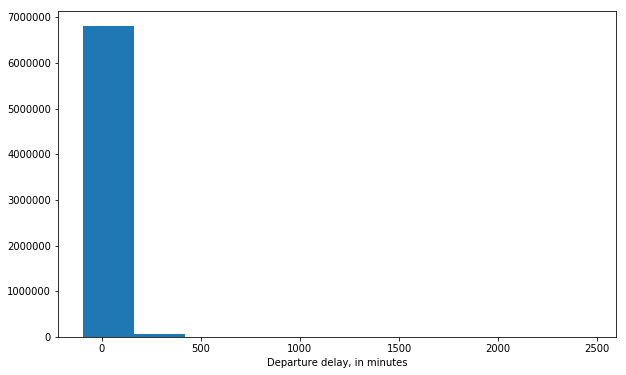

In [13]:
#plot the distribution of Departure delay
plt.figure(figsize = [10, 6])
plt.hist(data= df, x ='DepDelay')
plt.xlabel('Departure delay, in minutes')
plt.show()

The histogram for the distribution of minutes of departure delay doesn't show much info due to outliers. Let's zoom further by using axis limits.

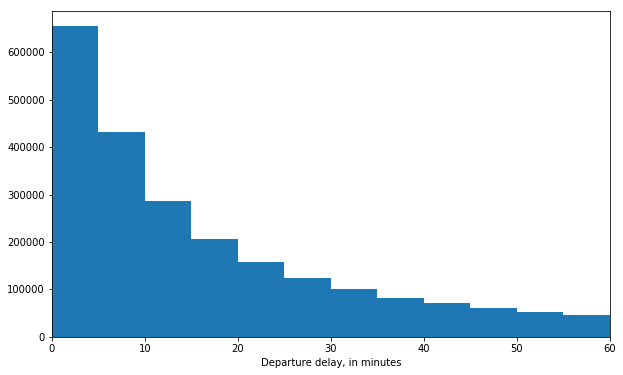

In [14]:
bin_edges = np.arange(0, df.DepDelay.max()+5, 5)
plt.figure(figsize = [10, 6])
plt.hist(data= df_delayed, x ='DepDelay',bins = bin_edges)
plt.xlim((0,60))
plt.xlabel('Departure delay, in minutes')
plt.show()

The histogram is showing a right-skewed distribution. As the minutes of delay increases, the number of delayed flights decreases. The majority of delayed flights are delayed for less than 5 minutes.

Next I will look into the distribution of departure delay minutes based on reason.

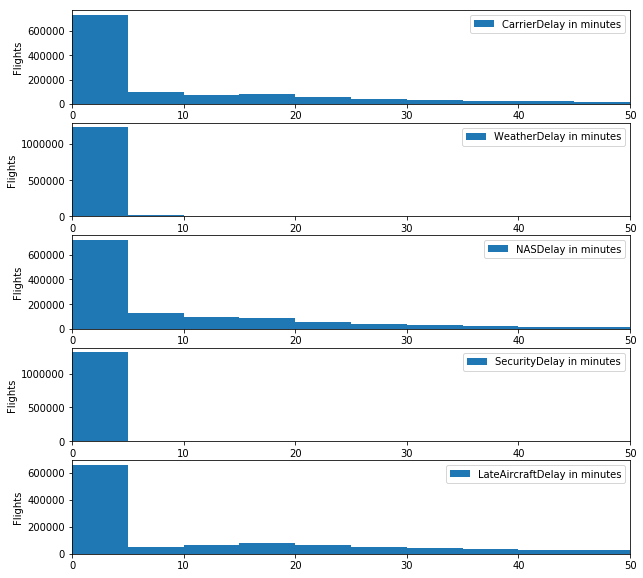

In [15]:
#plot the distribution of all five variables
fig, ax = plt.subplots(nrows=5, figsize = [10,10])

variables = ['CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(df_delayed[var].min(), df_delayed[var].max(), 5)
    ax[i].hist(data = df_delayed, x = var, bins = bins,label='{} in minutes'.format(var))
    ax[i].set_ylabel('Flights')
    ax[i].set_xlim((0,50))
    ax[i].legend()

plt.show()

These histograms are showing that most of flights are delayed for less than 5 minutes regardless of the delay reason. Also it's showing a higher frequency of flights delayed for a longer time when the reason of delay is "Late Aircraft Delay".

Next I will look into the origin of delayed flights.

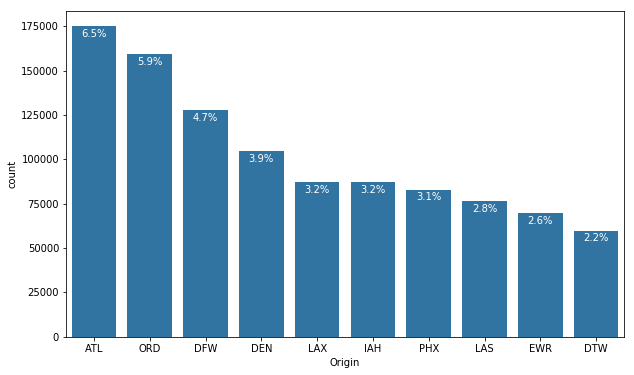

In [16]:
#create the plot
base_color = sb.color_palette()[0]
origin_delayed_counts = df_delayed.Origin.value_counts()
plt.figure(figsize = [10, 6])
sb.countplot(data = df_delayed, x = 'Origin', color = base_color, order = origin_delayed_counts.index[:10])

#loop through each pair of locations and labels and write the corresponding precentage
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = origin_delayed_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/df_delayed.shape[0])
    plt.text(loc, count-6000, pct_string, ha = 'center', color = 'w')
    
plt.show()

The above plot showing the highest 10 airports per delayed flights. Atlanta airport comes first on the list with about 175,000 delayed flights (6.5% of all delayed flights).

Next I will look into delayed flights by month.

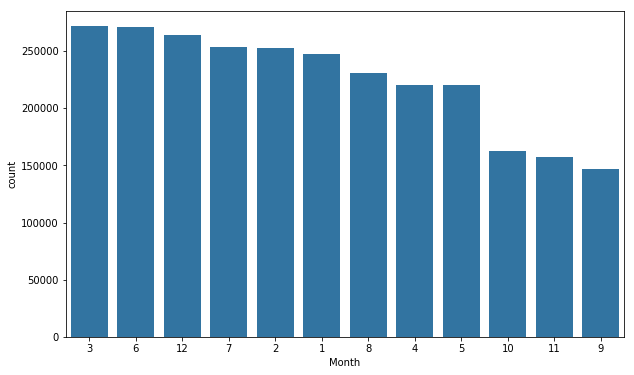

In [17]:
month_counts = df_delayed.Month.value_counts().index
plt.figure(figsize = [10, 6])
sb.countplot(data = df_delayed, x = 'Month', color = base_color, order = month_counts)

plt.show()

The above plot showing that the highest number of delayed flights occurs on March, and June.

Next I will look into reasons behind flight cancellations.

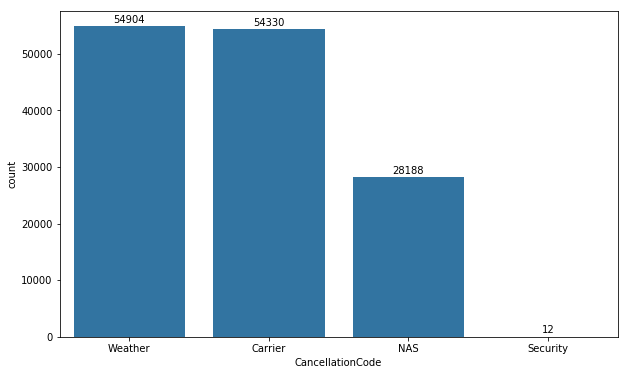

In [18]:
cancel_counts = df.CancellationCode.value_counts()
plt.figure(figsize = [10, 6])
sb.countplot(data = df, x = 'CancellationCode', color = base_color, order = cancel_counts.index)

#print the exact count above each bar
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cancel_counts[label.get_text()]
    plt.text(loc, count+600, count, ha = 'center', color = 'black')
    
plt.show()

The above plot is showing that the most common reason for flight cancellations is the weather. Similarly, flights cancellation caused by carrier comes second on the list. Also, the plot showing that it's very rarely a security issue causes a flight cancellation.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of departure delay minutes had some outliers. Some records had a negative value meaning the flight actually departed before the scheduled time. Also, some records had a very long delay. The dataset showed that majority of delayed flights were delayed for less than 5 minutes. The dataset showed that some airport had more than 150K delayed flights, which is not promising for passengers traveling through these airports.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When plotting histograms I used matplotlib function "xlim" to set the histogram's axis limit to zoom in the main bulk of data.
I created new DataFrame which consist of only delayed flights, to use it to get accurate info when analyzing delayed flights.


## Bivariate Exploration

First I will look into correlations between pairs of numeric variables in the dataset.

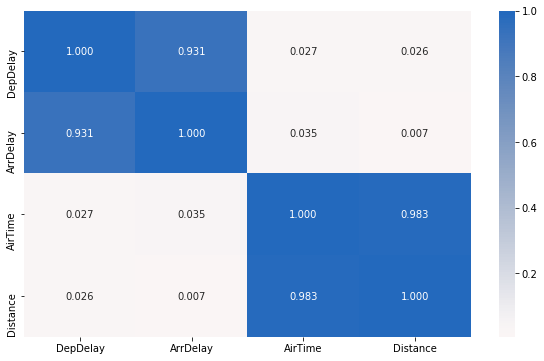

In [19]:
numeric_vars = ['DepDelay','ArrDelay','AirTime','Distance']
#correlation plot
plt.figure(figsize = [10, 6])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

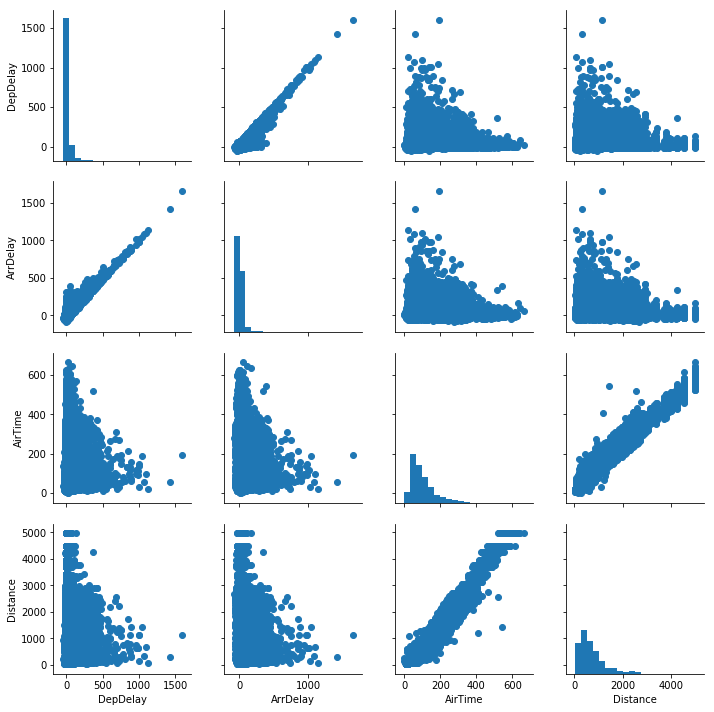

In [20]:
#take sample of the data to quickly and clearly plot the scatter matrix
df_sample = df.sample(500000)

g = sb.PairGrid(data = df_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

plt.show()

As expected there's a strong relationship between the two variables "DepDelay & ArrDelay", because if a flight is delayed, it will surely arrives later than the scheduled arrival time. Also, as expected there's a relationship between the two variables "Distance & AirTime".

Next I will look into minutes of departure delay by month.

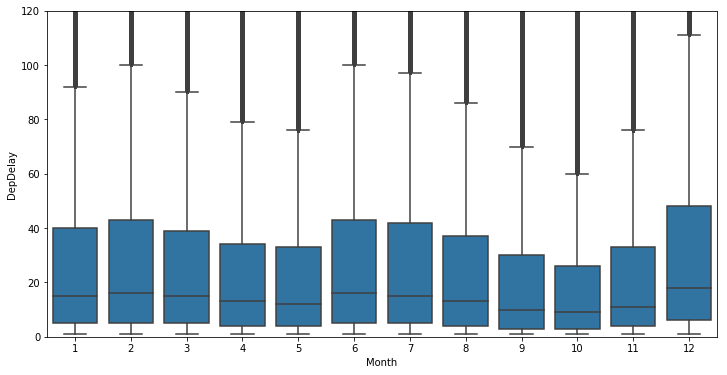

In [21]:
#create the plot
plt.figure(figsize = [12, 6])

sb.boxplot(data = df_delayed, x = 'Month', y = 'DepDelay', color = base_color)
plt.ylim((0,120))

plt.show()

Looking at the above plot we can see that minutes of departure delay varies over the months. Interestingly, on December flights are delayed for a longer time even though December is ranked 3rd in terms of number of delayed flight per month.

Next I will look into departure delay by day type.

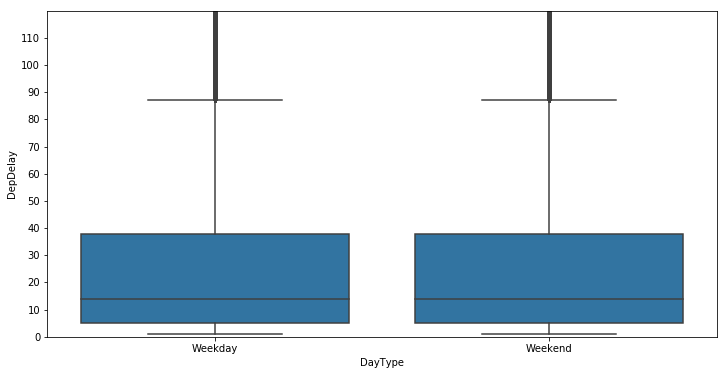

In [22]:
#create the plot
plt.figure(figsize = [12, 6])

sb.boxplot(data = df_delayed, x = 'DayType', y = 'DepDelay', color = base_color)
plt.ylim((0,120))
plt.yticks(np.arange(0,120,10))
plt.show()

The above plot compares the departure delay for flights scheduled on a weekday or weekend. It's showing an almost identical delay time for both! 

Next I will look into monthly cancelled flights by cancellation reason.

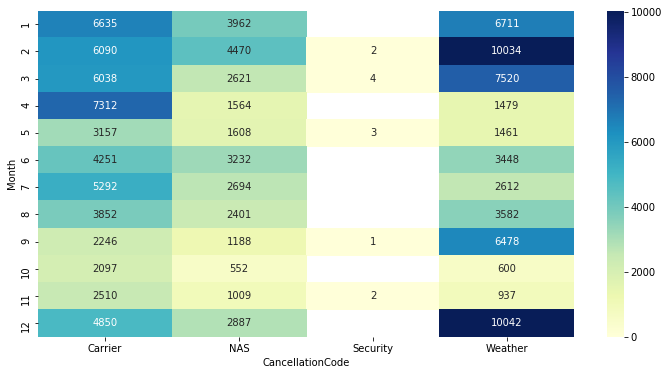

In [23]:
#summarize the two variables of interest
ct_counts = df.groupby(['CancellationCode', 'Month']).size()
ct_counts = ct_counts.reset_index(name= 'count')
ct_counts = ct_counts.pivot(index = 'Month', columns = 'CancellationCode', values = 'count')

#create the plot
plt.figure(figsize = [12, 6])
sb.heatmap(ct_counts, annot= True, fmt= '.0f', cmap= 'YlGnBu')

plt.show()

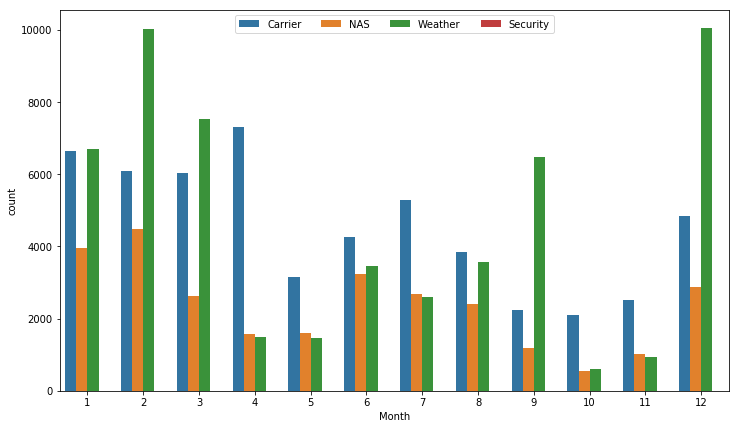

In [24]:
#clustered bar chart
plt.figure(figsize = [12, 7])
sb.countplot(data = df, x = 'Month', hue = 'CancellationCode')
plt.legend(loc= 9,ncol= 4)

plt.show()

We already knew that overall weather is the most common reason for flight cancellations. However, when looking into it on a monthly basis, weather causes more flights to be cancelled compared to other cancellation reasons in just 5 months. Additionally, it's noticed that the majority of flights cancelled due to weather reasons happened during the winter season (December-March).

Next I will look into average departure delay based on origin.

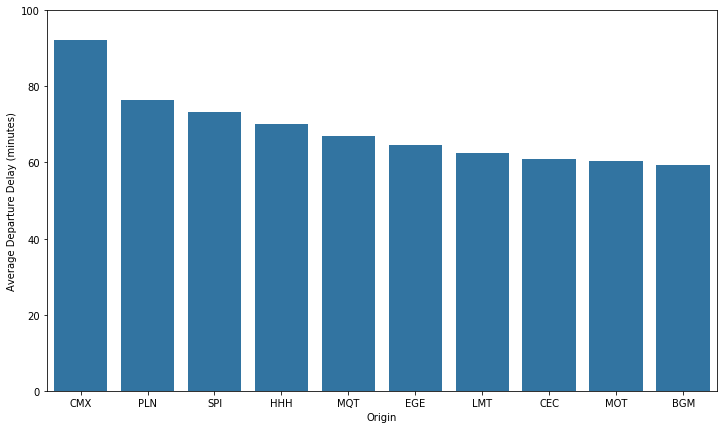

In [25]:
#create the plot
origin_avg_delay = df_delayed.groupby('Origin').DepDelay.mean().sort_values(ascending=False)[:10]
plt.figure(figsize = [12, 7])
sb.barplot(data = df_delayed, x = 'Origin', y = 'DepDelay', color = base_color,
           errwidth = 0, order = origin_avg_delay.index)
plt.ylabel('Average Departure Delay (minutes)')
plt.ylim((0,100))
plt.show()

The above plot showing the top 10 airport based on average minutes of departure delay, with Houghton County Memorial Airport (CMX) being first. Interestingly, we looked before into the top 10 airports based on number of delayed flights, and none of the above airports were present on that list. So, passengers travelling via above airports are less likely to face a delay, but if they do, it will be a long wait!

Let's investigate more by create scatter plot for delay probability and average DepDelay for each Origin (airport)

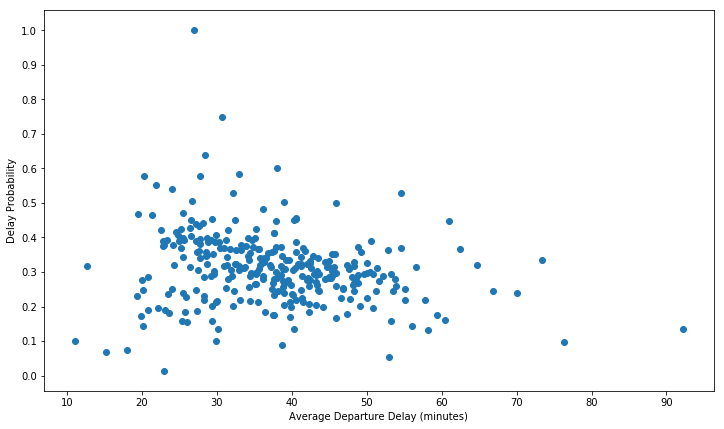

In [26]:
#get delay probability and average delay for each airport
prob_delayed = df_delayed.Origin.value_counts().sort_index().values/df.Origin.value_counts().sort_index().values
avg_delayed = df_delayed.groupby('Origin')['DepDelay'].mean().values

#creata the plot
plt.figure(figsize = [12, 7])
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Delay Probability')
plt.yticks(np.arange(0,1.1,.1))
plt.scatter(x= avg_delayed, y= prob_delayed)

plt.show() 

In above plot each point represent an airport's average departure delay & probability of flight being delayed. We can see that all airports with high average departure delay tend to have low delay probability. All airports with an average of 50+ minutes of departure delay, have lower than 50% probability of flights delay. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

During this part of the exploration, the dataset showed an expected relationship between the two variables “Dep Delay & Arrival Delay”. Since normally if a flight departure is delayed for a set amount of time, it will result in arrival being also delayed for the same set of time. Also, as expected the dataset showed strong relationship between “Distance & Air Time”. The dataset didn’t show a relationship between departure delay and distance.

When looking into flight cancellation reason by month, the dataset showed clear relationship between winter season and weather. As the majority of flights cancelled due to weather, did occur during the winter (December - March). Also, it’s worth noting that flights were delayed for longer time during winter season, especially in December.

It was interesting to find that airports which have a fairly low probability of flights delay, tends to have a high average departure delay.


## Multivariate Exploration

First I will look into departure delay by distance for flights in weekday or weekend.

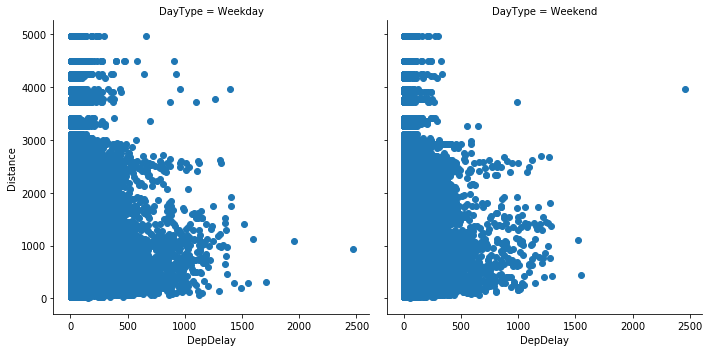

In [27]:
#create the plot
g = sb.FacetGrid(data = df_delayed, col = 'DayType', height = 5)
g.map(plt.scatter, 'DepDelay', 'Distance')

plt.show()

The above plot showing that long distance flights are delayed for a longer time during the weekdays.

Next I will look into delayed flights' actual scheduled departure time, by flight distance.

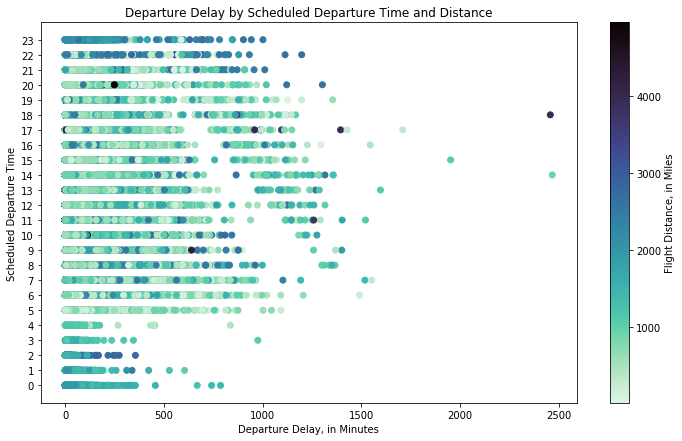

In [28]:
#create the plot
plt.figure(figsize = [12, 7])
plt.scatter(data = df_delayed, x = 'DepDelay', y = 'CRDepHour', c = 'Distance',
            cmap = 'mako_r')

plt.colorbar(label='Flight Distance, in Miles')
plt.title('Departure Delay by Scheduled Departure Time and Distance')
plt.xlabel('Departure Delay, in Minutes')
plt.ylabel('Scheduled Departure Time')
plt.yticks(np.arange(0,23+1,1))

plt.show()

The above plot showing that delayed flights which were originally scheduled to departue very late at night, tends to be a long distance flights.

Next I will look into actual scheduled departure time for cancelled flights, by weekday and weekend.

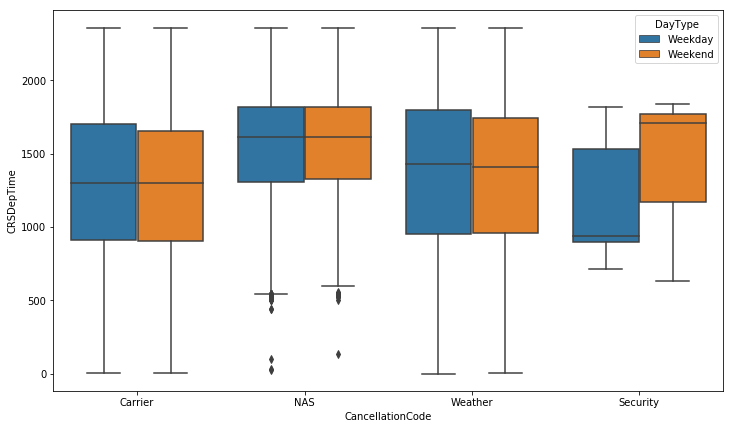

In [29]:
#create the plot
plt.figure(figsize = [12, 7])
sb.boxplot(data = df, x = 'CancellationCode', y = 'CRSDepTime', hue = 'DayType')

plt.show()

Above plot is showing clear similarity in scheduled departure time when we look into each category of "cancellation reason" by weekday or weekend cancelled flights. For example if we look into flights cancelled for weather reasons, we can see that the majority of these flights were scheduled to departure between 10:00 To 18:00 whether it was a weekday or on the weekend.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

During this part of the exploration, the data showed that long distance flights are delayed for a longer time during the weekdays compared to weekends. Also, data showed delayed flights which were scheduled for a late departure  tend to be long distance flights.

Additionally, when I looked into scheduled departure time for cancelled flights by day type and cancellation reason. The data showed similarity between weekday flights, and weekend flights for most the cancellation reason.

### Were there any interesting or surprising interactions between features?

It's kind of interesting to see that flights which were cancelled due to weather reasons, were scheduled to leave during the time 10:00 to 18:00. It's interesting because generally speaking, the weather during this time of the day tend to be more mild.